<a href="https://colab.research.google.com/github/Krishnaa548/Deep_learning_ml/blob/main/Advanced_Big_Data_Processing_%26_Customer_Segmentation_in_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn faker scikit-learn plotly tqdm

# Import required libraries
import pandas as pd
import numpy as np
import random
import uuid
from faker import Faker
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
fake = Faker()
Faker.seed(42)

# Set visualization style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

print("Environment setup complete!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.2 MB/s eta 0:00:00
Environment setup complete!


Generating Users:   0%|          | 0/5000 [00:00<?, ?it/s]

Generated 5000 user records

Sample user data:


,user_id,name,email,age,gender,country,city,income_level,registration_date,is_prime_member,preferred_payment
0,6f9107d4-7385-41a5-991c-d606bf2a6149,Allison Hill,donaldgarcia@example.net,21,M,Germany,New Roberttown,High,2025-03-01 18:56:05.794021,True,Debit Card
1,85926f2f-37f5-4855-8624-f4ccdd22eb84,David Guzman,jennifermiles@example.com,38,M,United States,South Bridget,Medium,2025-04-13 18:56:05.794021,True,Bank Transfer
2,eb672356-a4ce-4871-bc80-e6aa385ee017,Abigail Shaffer,jpeterson@example.org,38,M,United States,Curtisfurt,Low,2025-04-20 18:56:05.794021,True,Debit Card



User demographics summary:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
user_id,5000,5000,bd59c3b9-52b8-4092-b5b1-876ba363da2d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,5000,4827,James Brown,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email,5000,4939,hjohnson@example.com,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5000.0,NaN,NaN,NaN,34.8932,18.0,26.0,34.0,43.0,75.0,11.218171
gender,5000,3,M,1713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,5000,10,United States,1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,5000,4359,Robertmouth,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_level,5000,4,Medium,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
registration_date,5000,NaN,NaN,NaN,2024-12-25 02:06:39.394021120,2024-04-22 18:56:05.794021,2024-10-07 18:56:05.794021120,2025-01-24 18:56:05.794021120,2025-03-31 18:56:05.794021120,2025-04-21 18:56:05.794021,NaN
is_prime_member,5000,2,False,2503,NaN,NaN,NaN,NaN,NaN,NaN,NaN


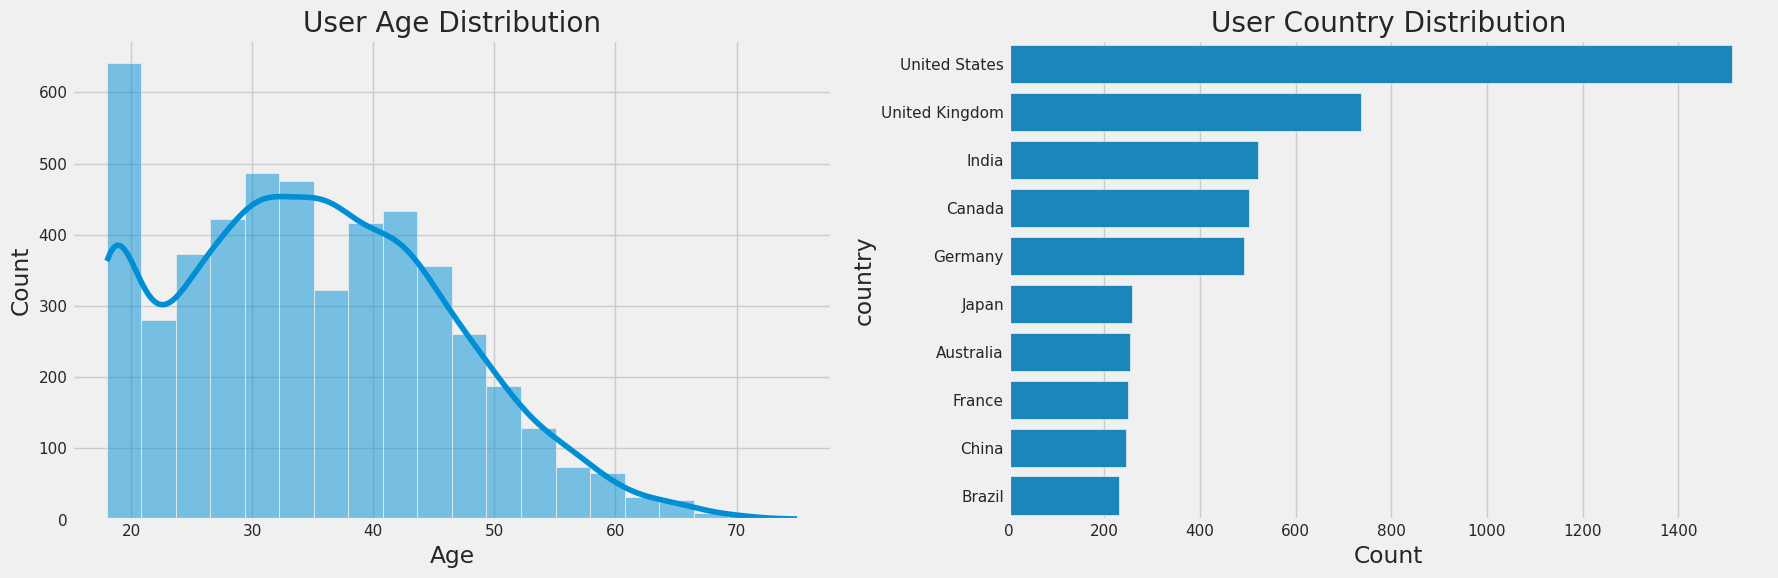

In [ ]:
# Constants for data generation
NUM_USERS = 5000  # Increased for better big data simulation
NUM_PRODUCTS = 500  # More products for diversity
NUM_EVENTS = 100000  # More events for realistic big data simulation
START_DATE = datetime.now() - timedelta(days=365)  # Expanding to 1 year of data
END_DATE = datetime.now()

def generate_users(num_users):
    """
    Generate synthetic user data with demographic information
    """
    countries = ['United States', 'Canada', 'United Kingdom', 'Germany',
                 'France', 'Australia', 'Japan', 'India', 'Brazil', 'China']
    country_weights = [0.3, 0.1, 0.15, 0.1, 0.05, 0.05, 0.05, 0.1, 0.05, 0.05]

    # Income levels for customer value potential analysis
    income_brackets = ['Low', 'Medium', 'High', 'Very High']
    income_weights = [0.3, 0.4, 0.2, 0.1]

    users = []
    for _ in tqdm(range(num_users), desc="Generating Users"):
        # Create registration date with more realistic distribution
        days_ago = int(np.random.power(0.5) * 365)  # Power distribution favors recent signups
        reg_date = END_DATE - timedelta(days=days_ago)

        # Country selection with weighted distribution
        country = random.choices(countries, weights=country_weights, k=1)[0]

        # Age distribution as normal distribution centered around 35
        age = int(np.clip(np.random.normal(35, 12), 18, 80))

        user = {
            'user_id': str(uuid.uuid4()),
            'name': fake.name(),
            'email': fake.email(),
            'age': age,
            'gender': random.choice(['M', 'F', 'Other']),
            'country': country,
            'city': fake.city(),
            'income_level': random.choices(income_brackets, weights=income_weights, k=1)[0],
            'registration_date': reg_date,
            'is_prime_member': random.choice([True, False]),
            'preferred_payment': random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'])
        }
        users.append(user)

    return pd.DataFrame(users)

# Generate user data
users_df = generate_users(NUM_USERS)

# Display sample and stats
print(f"Generated {len(users_df)} user records")
print("\nSample user data:")
display(users_df.head(3))
print("\nUser demographics summary:")
display(users_df.describe(include='all').T)

# Quick user visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Age distribution
sns.histplot(users_df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('User Age Distribution')
axes[0].set_xlabel('Age')

# Country distribution
country_counts = users_df['country'].value_counts()
sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[1])
axes[1].set_title('User Country Distribution')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()


Generating Products:   0%|          | 0/500 [00:00<?, ?it/s]

Generated 500 product records

Sample product data:


,product_id,name,brand,main_category,sub_category,price,stock,rating,discount_eligible,launch_date,shipping_weight
0,1561e44b-74b2-48a9-8c21-11f62e2fbbea,Scholastic I Children's,Scholastic,Books,Children's,343.51,92,4.9,True,2024-06-19 18:56:05.794021,15.51
1,aa1e6ccf-3a33-425d-9a28-d855b176851c,Olay Laugh Fragrances,Olay,Beauty,Fragrances,368.26,459,5.0,True,2025-03-19 18:56:05.794021,13.90
2,e971c71c-ea4e-4032-b852-6ec84c0331a3,Penguin Exist Educational,Penguin,Books,Educational,361.71,105,4.3,False,2024-09-24 18:56:05.794021,9.82



Product category distribution:


,count
main_category,
Sports,74
Toys,65
Clothing,65
Electronics,64
Beauty,63
Books,60
Home,56
Food,53


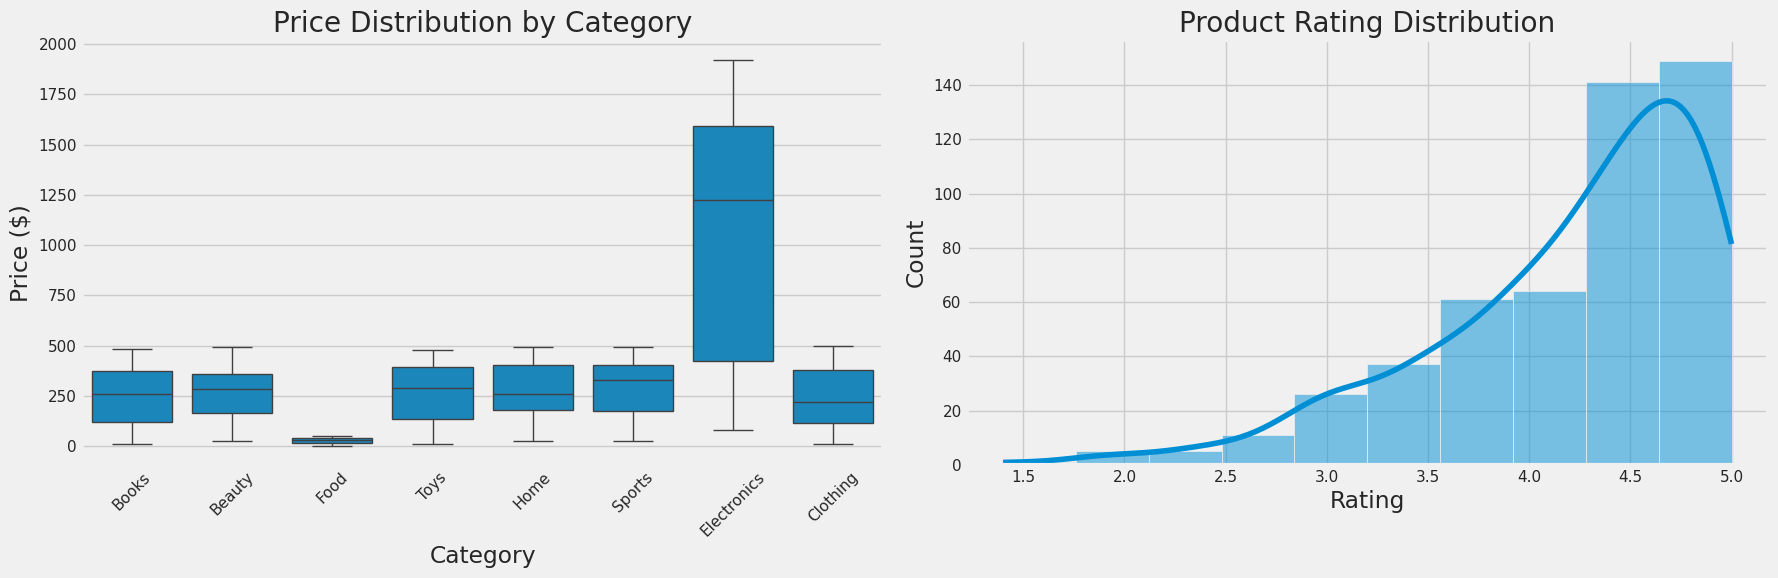

In [ ]:
def generate_products(num_products):
    """
    Generate synthetic product data with categories, prices, and other attributes
    """
    main_categories = {
        "Electronics": ["Smartphones", "Laptops", "Audio", "Cameras", "Accessories"],
        "Clothing": ["Men's", "Women's", "Children's", "Sportswear", "Accessories"],
        "Home": ["Furniture", "Kitchen", "Decor", "Bedding", "Appliances"],
        "Beauty": ["Skincare", "Makeup", "Haircare", "Fragrances", "Tools"],
        "Books": ["Fiction", "Non-fiction", "Educational", "Children's", "E-books"],
        "Sports": ["Equipment", "Apparel", "Outdoors", "Fitness", "Accessories"],
        "Toys": ["Action Figures", "Board Games", "Educational", "Outdoor", "Dolls"],
        "Food": ["Snacks", "Beverages", "Organic", "Gourmet", "Pantry"]
    }

    brands = {
        "Electronics": ["Apple", "Samsung", "Sony", "LG", "Dell", "HP", "Bose", "Canon"],
        "Clothing": ["Nike", "Adidas", "Zara", "H&M", "Levi's", "Gap", "Uniqlo", "Under Armour"],
        "Home": ["IKEA", "Crate & Barrel", "Williams-Sonoma", "Wayfair", "Ashley", "Dyson"],
        "Beauty": ["L'Oreal", "Estée Lauder", "Neutrogena", "MAC", "Dove", "Olay"],
        "Books": ["Penguin", "Random House", "HarperCollins", "Simon & Schuster", "Scholastic"],
        "Sports": ["Nike", "Adidas", "Wilson", "Callaway", "Columbia", "The North Face"],
        "Toys": ["LEGO", "Mattel", "Hasbro", "Fisher-Price", "Nintendo"],
        "Food": ["Nestlé", "Kraft", "Kellogg's", "PepsiCo", "General Mills", "Hershey's"]
    }

    products = []
    for _ in tqdm(range(num_products), desc="Generating Products"):
        main_category = random.choice(list(main_categories.keys()))
        sub_category = random.choice(main_categories[main_category])
        brand = random.choice(brands[main_category])

        # Price distribution varies by category
        if main_category == "Electronics":
            price = round(random.uniform(50.0, 2000.0), 2)
        elif main_category == "Food":
            price = round(random.uniform(2.0, 50.0), 2)
        else:
            price = round(random.uniform(10.0, 500.0), 2)

        # Create more realistic product names
        if main_category == "Electronics":
            name = f"{brand} {sub_category} {random.choice(['Pro', 'Plus', 'Ultra', 'Max', 'Mini'])}"
        elif main_category == "Food":
            name = f"{brand} {random.choice(['Organic', 'Gourmet', 'Classic', 'Premium'])} {sub_category}"
        else:
            name = f"{brand} {fake.word().capitalize()} {sub_category}"

        # Exponential distribution for stock levels
        stock = int(np.random.exponential(scale=100))

        # More realistic product ratings (biased toward positive)
        rating_base = np.random.beta(4, 1)  # Beta distribution favoring higher values
        rating = round(1 + rating_base * 4, 1)  # Scale to 1-5 range

        # Generate realistic launch date
        launch_days_ago = int(np.random.exponential(scale=180))
        launch_date = END_DATE - timedelta(days=min(launch_days_ago, 730))  # Max 2 years old

        product = {
            'product_id': str(uuid.uuid4()),
            'name': name,
            'brand': brand,
            'main_category': main_category,
            'sub_category': sub_category,
            'price': price,
            'stock': stock,
            'rating': rating,
            'discount_eligible': random.choice([True, False]),
            'launch_date': launch_date,
            'shipping_weight': round(random.uniform(0.1, 20.0), 2) if main_category != "Electronics" else round(random.uniform(0.5, 30.0), 2)
        }
        products.append(product)

    return pd.DataFrame(products)

# Generate product data
products_df = generate_products(NUM_PRODUCTS)

# Display sample and stats
print(f"Generated {len(products_df)} product records")
print("\nSample product data:")
display(products_df.head(3))
print("\nProduct category distribution:")
display(products_df['main_category'].value_counts())

# Visualizations for product data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Price distribution by main category
sns.boxplot(x='main_category', y='price', data=products_df, ax=axes[0])
axes[0].set_title('Price Distribution by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Price ($)')
axes[0].tick_params(axis='x', rotation=45)

# Rating distribution
sns.histplot(products_df['rating'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Product Rating Distribution')
axes[1].set_xlabel('Rating')

plt.tight_layout()
plt.show()

# Create category-subcategory heatmap using plotly
category_subcategory = products_df.groupby(['main_category', 'sub_category']).size().reset_index(name='count')
category_pivot = category_subcategory.pivot(index='main_category', columns='sub_category', values='count').fillna(0)

fig = px.imshow(category_pivot,
                labels=dict(x="Sub-Category", y="Main Category", color="Count"),
                title="Product Distribution: Main Categories vs. Sub-Categories")
fig.update_layout(height=500, width=900)
fig.show()


Generating Events:   0%|          | 0/100000 [00:00<?, ?it/s]

Generated 100000 event records

Sample event data:


,event_id,user_id,product_id,event_type,timestamp,device,session_id,referrer,ip_address,quantity,unit_price,discounted_price,amount,payment_method,review_rating,review_length
0,0f1bb9cf-b121-44a5-bdab-47af42fb627e,0a3fee56-92e0-4cd1-835d-d5a3d47c0749,133b7a72-dc19-4088-9e90-59d77556a65e,view,2025-04-20 12:09:32,tablet,1548bb35,social_media,144.169.214.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66a396fe-16a0-4cba-b531-c8d0ba9839a8,8b046c8e-cc7e-4fd0-9851-e88423a259e8,3e7226eb-e402-4e4b-92a2-f7723d0c0ff5,add_to_cart,2025-04-12 13:43:01,mobile,cd350b99,None,27.105.148.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73fedf0d-313a-4489-81b9-e5a8f582a5d7,3b358f58-a92a-47ee-9e78-553313adec01,1f803de2-5bb3-4e02-9b42-63cb3a8e4cae,view,2025-02-21 13:22:47,desktop,ed9af0d2,search_engine,240e:7c79:d7e5:f957:53ce:993f:35f9:e42d,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Event type distribution:


,count
event_type,
view,39489
click,19985
add_to_cart,16897
purchase,10480
wishlist,5187
remove_from_cart,4939
review,3023


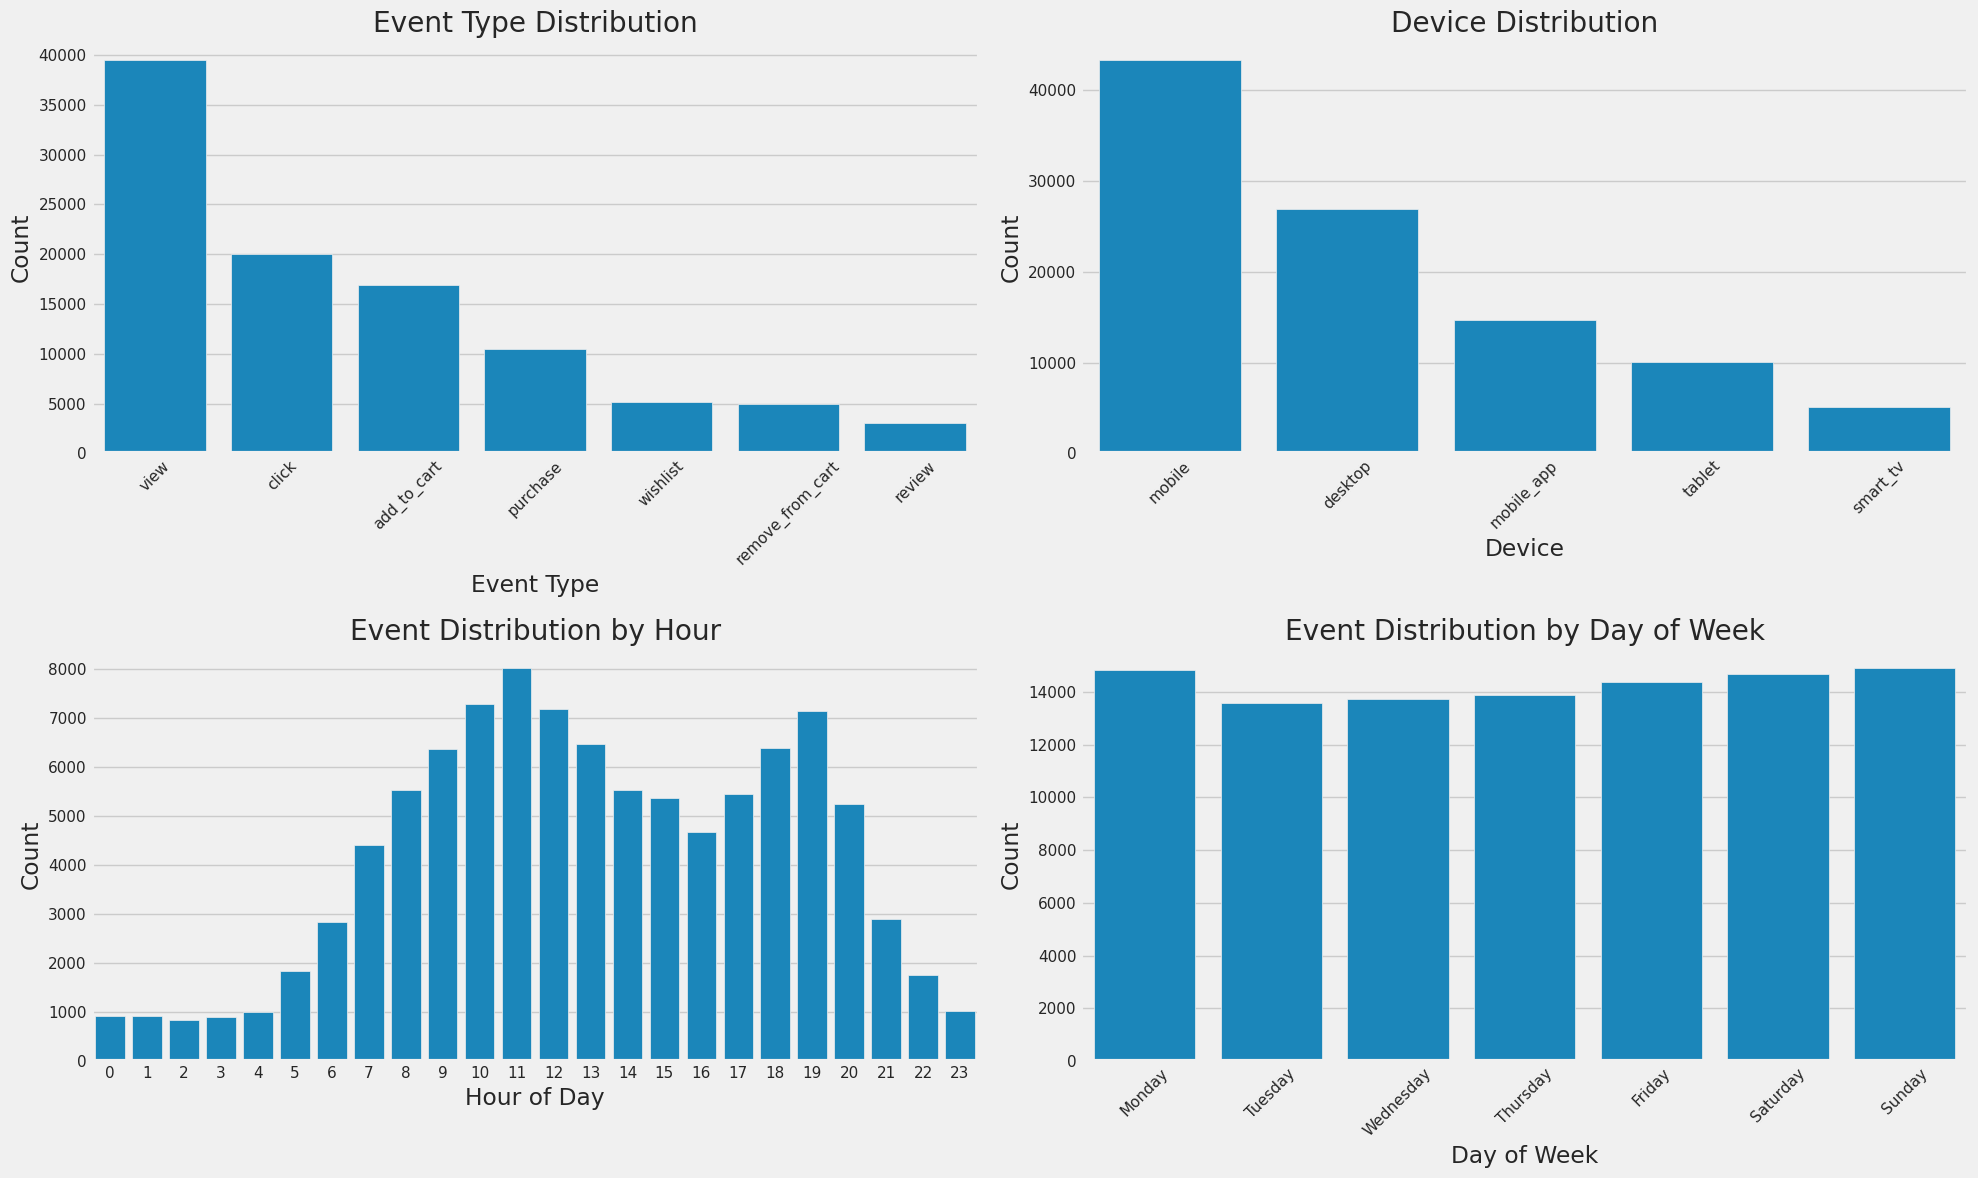

In [ ]:
def generate_events(users_df, products_df, num_events):
    """
    Generate synthetic user interaction events with realistic patterns
    """
    # Define event types and their probability weights
    events = ["view", "click", "add_to_cart", "purchase", "remove_from_cart", "wishlist", "review"]
    event_weights = [0.45, 0.2, 0.15, 0.08, 0.05, 0.05, 0.02]  # More realistic distribution

    # Define device types and their probability weights
    devices = ["mobile", "desktop", "tablet", "mobile_app", "smart_tv"]
    device_weights = [0.4, 0.3, 0.1, 0.15, 0.05]  # More diverse device types

    # Define referral sources
    referrers = ["direct", "search_engine", "social_media", "email", "affiliate", "ad_campaign"]
    referrer_weights = [0.3, 0.25, 0.2, 0.1, 0.05, 0.1]

    # Access necessary data
    user_ids = users_df['user_id'].tolist()
    product_ids = products_df['product_id'].tolist()

    # Create dictionaries for faster lookups
    product_details = products_df.set_index('product_id').to_dict('index')
    user_details = users_df.set_index('user_id').to_dict('index')

    # Generate events
    events_data = []

    for _ in tqdm(range(num_events), desc="Generating Events"):
        # Select a random user
        user_id = random.choice(user_ids)
        user_info = user_details[user_id]

        # More loyal customers (prime members) have more interactions
        if user_info['is_prime_member'] and random.random() < 0.6:
            # Pick a product with preference for certain categories based on demographics
            if user_info['gender'] == 'M' and random.random() < 0.7:
                filtered_products = [p for p in product_ids
                                    if product_details[p]['main_category'] in ['Electronics', 'Sports']]
                product_id = random.choice(filtered_products if filtered_products else product_ids)
            elif user_info['gender'] == 'F' and random.random() < 0.7:
                filtered_products = [p for p in product_ids
                                    if product_details[p]['main_category'] in ['Clothing', 'Beauty']]
                product_id = random.choice(filtered_products if filtered_products else product_ids)
            else:
                product_id = random.choice(product_ids)
        else:
            product_id = random.choice(product_ids)

        product_info = product_details[product_id]

        # Determine event type with custom rules
        if product_info['rating'] >= 4.5 and random.random() < 0.6:
            # Higher-rated products more likely to be purchased
            event_type = random.choices(events, weights=[0.3, 0.2, 0.2, 0.15, 0.05, 0.05, 0.05], k=1)[0]
        elif product_info['stock'] < 10 and random.random() < 0.7:
            # Low stock increases urgency for purchase
            event_type = random.choices(events, weights=[0.2, 0.2, 0.25, 0.2, 0.05, 0.05, 0.05], k=1)[0]
        else:
            event_type = random.choices(events, weights=event_weights, k=1)[0]

        # Device selection with demographic biases
        if user_info['age'] < 30:
            device = random.choices(devices, weights=[0.5, 0.2, 0.1, 0.15, 0.05], k=1)[0]  # Younger users prefer mobile
        elif user_info['age'] > 60:
            device = random.choices(devices, weights=[0.2, 0.45, 0.15, 0.05, 0.15], k=1)[0]  # Older users prefer desktop
        else:
            device = random.choices(devices, weights=device_weights, k=1)[0]

        # Time pattern simulation (more events during daytime and evenings)
        days_ago = int(np.random.exponential(scale=60))  # Exponential distribution favoring recent events
        base_date = END_DATE - timedelta(days=min(days_ago, 365))

        # Hour distribution - more activity during waking hours
        hour_weights = [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09,
                        0.08, 0.07, 0.06, 0.06, 0.05, 0.06, 0.07, 0.08, 0.06, 0.03, 0.02, 0.01]
        hour = random.choices(range(24), weights=hour_weights, k=1)[0]

        # Weekend vs weekday patterns
        if base_date.weekday() >= 5:  # Weekend
            hour = (hour + random.randint(-1, 1)) % 24  # More variation on weekends

        timestamp = datetime(base_date.year, base_date.month, base_date.day,
                           hour, random.randint(0, 59), random.randint(0, 59))

        # Referral source
        if event_type in ["view", "click"]:
            referrer = random.choices(referrers, weights=referrer_weights, k=1)[0]
        else:
            referrer = None  # Only track referrer for initial interactions

        # Create the event
        event = {
            'event_id': str(uuid.uuid4()),
            'user_id': user_id,
            'product_id': product_id,
            'event_type': event_type,
            'timestamp': timestamp,
            'device': device,
            'session_id': str(uuid.uuid4())[:8],
            'referrer': referrer,
            'ip_address': fake.ipv4() if random.random() < 0.8 else fake.ipv6()
        }

        # Add purchase-specific data
        if event_type == "purchase":
            # Higher income users buy more quantity
            if user_info['income_level'] in ['High', 'Very High']:
                quantity = random.randint(1, 5)
            else:
                quantity = random.randint(1, 3)

            price = product_info['price']

            # Apply discounts for eligible products
            if product_info['discount_eligible'] and random.random() < 0.7:
                discount_rate = random.choice([0.05, 0.1, 0.15, 0.2, 0.25])
                discounted_price = round(price * (1 - discount_rate), 2)
            else:
                discounted_price = price

            event['quantity'] = quantity
            event['unit_price'] = price
            event['discounted_price'] = discounted_price
            event['amount'] = round(discounted_price * quantity, 2)
            event['payment_method'] = user_info['preferred_payment']

        # Add review-specific data
        elif event_type == "review":
            # Review tends to be closer to the product's average rating
            base_rating = product_info['rating']
            deviation = random.choice([-1, -0.5, 0, 0.5, 1])
            review_rating = max(1, min(5, base_rating + deviation))
            event['review_rating'] = round(review_rating, 1)
            event['review_length'] = random.randint(10, 200)  # Character count of review

        events_data.append(event)

    return pd.DataFrame(events_data)

# Generate events
events_df = generate_events(users_df, products_df, NUM_EVENTS)

# Display sample and stats
print(f"Generated {len(events_df)} event records")
print("\nSample event data:")
display(events_df.head(3))
print("\nEvent type distribution:")
display(events_df['event_type'].value_counts())

# Basic visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Event type distribution
event_counts = events_df['event_type'].value_counts()
sns.barplot(x=event_counts.index, y=event_counts.values, ax=axes[0, 0])
axes[0, 0].set_title('Event Type Distribution')
axes[0, 0].set_xlabel('Event Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Device distribution
device_counts = events_df['device'].value_counts()
sns.barplot(x=device_counts.index, y=device_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Device Distribution')
axes[0, 1].set_xlabel('Device')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Event distribution by hour
events_df['hour'] = events_df['timestamp'].dt.hour
hour_counts = events_df.groupby('hour').size()
sns.barplot(x=hour_counts.index, y=hour_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Event Distribution by Hour')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Count')

# Event distribution by day of week
events_df['day_of_week'] = events_df['timestamp'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = events_df['day_of_week'].value_counts().reindex(day_order)
sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Event Distribution by Day of Week')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Data preprocessing and feature engineering
def preprocess_data(events_df, users_df, products_df):
    """
    Preprocess and enrich the events data with user and product information
    """
    print("Starting data preprocessing...")

    # 1. Standardize timestamps and extract time components
    print("Extracting time components...")
    events_df['timestamp'] = pd.to_datetime(events_df['timestamp'])
    events_df['date'] = events_df['timestamp'].dt.date
    events_df['hour'] = events_df['timestamp'].dt.hour
    events_df['day_of_week'] = events_df['timestamp'].dt.day_name()
    events_df['day_of_month'] = events_df['timestamp'].dt.day
    events_df['week_of_year'] = events_df['timestamp'].dt.isocalendar().week
    events_df['month'] = events_df['timestamp'].dt.month
    events_df['quarter'] = events_df['timestamp'].dt.quarter
    events_df['is_weekend'] = events_df['timestamp'].dt.dayofweek >= 5

    # 2. Merge product information into events
    print("Merging product data...")
    product_cols = ['product_id', 'name', 'brand', 'main_category', 'sub_category', 'price', 'rating']
    events_with_products = pd.merge(
        events_df,
        products_df[product_cols],
        on='product_id',
        how='left'
    ).rename(columns={'name': 'product_name'})

    # 3. Merge user information into events
    print("Merging user data...")
    user_cols = ['user_id', 'name', 'gender', 'age', 'country', 'income_level', 'is_prime_member']
    full_events = pd.merge(
        events_with_products,
        users_df[user_cols],
        on='user_id',
        how='left'
    ).rename(columns={'name': 'user_name'})

    # 4. Handle missing values
    print("Handling missing values...")
    # Fill missing quantities and amounts with 0
    full_events['quantity'] = full_events['quantity'].fillna(0)
    full_events['amount'] = full_events['amount'].fillna(0)
    full_events['unit_price'] = full_events['unit_price'].fillna(0)
    full_events['discounted_price'] = full_events['discounted_price'].fillna(0)
    full_events['review_rating'] = full_events['review_rating'].fillna(0)
    full_events['review_length'] = full_events['review_length'].fillna(0)

    # 5. Create derived features
    print("Creating derived features...")
    # Time since user registration
    full_events['days_since_registration'] = (full_events['timestamp'] -
                                              pd.to_datetime(users_df.set_index('user_id')
                                                          .loc[full_events['user_id']]['registration_date']
                                                          .values)).dt.days

    # Time since product launch
    full_events['days_since_product_launch'] = (full_events['timestamp'] -
                                               pd.to_datetime(products_df.set_index('product_id')
                                                           .loc[full_events['product_id']]['launch_date']
                                                           .values)).dt.days

    # Discount percentage for purchases
    purchase_mask = full_events['event_type'] == 'purchase'
    full_events.loc[purchase_mask, 'discount_percentage'] = (
        1 - (full_events.loc[purchase_mask, 'discounted_price'] / full_events.loc[purchase_mask, 'unit_price'])
    ) * 100
    full_events['discount_percentage'] = full_events['discount_percentage'].fillna(0)

    # Session-based features
    session_counts = full_events.groupby('session_id').size().to_dict()
    full_events['session_event_count'] = full_events['session_id'].map(session_counts)

    # 6. Create flags
    print("Creating flag fields...")
    full_events['is_purchase'] = full_events['event_type'] == 'purchase'
    full_events['is_cart_action'] = full_events['event_type'].isin(['add_to_cart', 'remove_from_cart'])
    full_events['is_engagement'] = full_events['event_type'].isin(['view', 'click', 'wishlist'])

    # 7. Filter purchase events for sales analysis
    print("Creating purchase-specific dataset...")
    purchases_df = full_events[full_events['event_type'] == 'purchase'].copy()

    print("Preprocessing complete!")
    return full_events, purchases_df

# Execute preprocessing
full_events, purchases_df = preprocess_data(events_df, users_df, products_df)

# Display sample of processed data
print("\nSample of fully processed event data:")
display(full_events.head(3))

print("\nSample of purchase data:")
display(purchases_df.head(3))

# Memory optimization - optional for very large datasets
def optimize_dataframe(df):
    """Optimize dataframe memory usage"""
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'object':
            if col not in ['timestamp', 'date']:
                df[col] = df[col].astype('category')
    return df

# Optimize memory usage
full_events = optimize_dataframe(full_events)
purchases_df = optimize_dataframe(purchases_df)

# Show memory usage
def mem_usage(df):
    return f"Memory usage: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB"

print(f"Full events dataset: {mem_usage(full_events)}")
print(f"Purchases dataset: {mem_usage(purchases_df)}")


Starting data preprocessing...
Extracting time components...
Merging product data...
Merging user data...
Handling missing values...
Creating derived features...
Creating flag fields...
Creating purchase-specific dataset...
Preprocessing complete!

Sample of fully processed event data:


,event_id,user_id,product_id,event_type,timestamp,device,session_id,referrer,ip_address,quantity,...,country,income_level,is_prime_member,days_since_registration,days_since_product_launch,discount_percentage,session_event_count,is_purchase,is_cart_action,is_engagement
0,0f1bb9cf-b121-44a5-bdab-47af42fb627e,0a3fee56-92e0-4cd1-835d-d5a3d47c0749,133b7a72-dc19-4088-9e90-59d77556a65e,view,2025-04-20 12:09:32,tablet,1548bb35,social_media,144.169.214.23,0.0,...,Brazil,Low,False,137,265,0.0,1,False,False,True
1,66a396fe-16a0-4cba-b531-c8d0ba9839a8,8b046c8e-cc7e-4fd0-9851-e88423a259e8,3e7226eb-e402-4e4b-92a2-f7723d0c0ff5,add_to_cart,2025-04-12 13:43:01,mobile,cd350b99,None,27.105.148.105,0.0,...,Germany,Very High,False,-9,311,0.0,1,False,True,False
2,73fedf0d-313a-4489-81b9-e5a8f582a5d7,3b358f58-a92a-47ee-9e78-553313adec01,1f803de2-5bb3-4e02-9b42-63cb3a8e4cae,view,2025-02-21 13:22:47,desktop,ed9af0d2,search_engine,240e:7c79:d7e5:f957:53ce:993f:35f9:e42d,0.0,...,United States,Very High,True,-10,-9,0.0,1,False,False,True



Sample of purchase data:


,event_id,user_id,product_id,event_type,timestamp,device,session_id,referrer,ip_address,quantity,...,country,income_level,is_prime_member,days_since_registration,days_since_product_launch,discount_percentage,session_event_count,is_purchase,is_cart_action,is_engagement
15,93d909a9-07f6-4431-9914-4b250e8ee9df,fe6f3f64-8c3e-4302-a1c4-a846070efb3b,2436dbe1-eb1f-4f31-80b4-370f5290602e,purchase,2024-12-30 14:40:28,smart_tv,84ab4e33,None,16.90.177.225,1.0,...,Japan,Medium,False,-113,84,5.002428,1,True,False,False
23,d76853db-cdab-44c2-8b2b-307fc4bf8b91,28e82e1d-657d-4ffa-b9e0-8a394dac8356,2f4d359b-1094-486f-b03e-180fdd33bf95,purchase,2025-03-14 19:17:25,mobile,a022dbe8,None,181.1.38.154,2.0,...,Japan,Medium,True,-10,123,5.001880,1,True,False,False
34,3bc595d0-68c1-4fb5-9cc7-fd105fef9110,aee07222-32ef-49d9-8783-f01d889fcd53,5dbac716-9a9b-4d86-8d12-ec810d23f2e8,purchase,2025-04-12 09:51:29,mobile,9b01f541,None,a416:7ce7:1054:f70c:5377:4601:27d6:738,3.0,...,United Kingdom,Medium,True,207,136,0.000000,1,True,False,False


Full events dataset: Memory usage: 43.46 MB
Purchases dataset: Memory usage: 5.63 MB


In [ ]:
# EDA - User Behavior Analysis
def analyze_user_behavior(full_events):
    """
    Analyze and visualize user behavior patterns
    """
    print("Starting user behavior analysis...")

    # 1. Event type distribution
    event_counts = full_events['event_type'].value_counts().reset_index()
    event_counts.columns = ['event_type', 'count']
    event_counts['percentage'] = 100 * event_counts['count'] / len(full_events)

    fig = px.bar(event_counts, x='event_type', y='count',
                 text=event_counts['percentage'].round(1).astype(str) + '%',
                 title='Event Type Distribution',
                 labels={'event_type': 'Event Type', 'count': 'Count'},
                 color='event_type')
    fig.update_layout(xaxis_title='Event Type', yaxis_title='Count', height=500)
    fig.show()

    # 2. User activity analysis - events per user
    user_activity = full_events.groupby('user_id').size().reset_index(name='event_count')
    user_activity_stats = user_activity['event_count'].describe()

    fig = px.histogram(user_activity, x='event_count', nbins=50,
                      title='Distribution of Events per User',
                      labels={'event_count': 'Number of Events', 'count': 'Number of Users'})
    fig.update_layout(height=500)
    fig.show()

    print("User Activity Statistics:")
    display(user_activity_stats)

    # 3. User activity by demographics
    gender_device = pd.crosstab(full_events['gender'], full_events['device'])
    fig = px.imshow(gender_device,
                   labels=dict(x="Device", y="Gender", color="Count"),
                   title="Device Usage by Gender")
    fig.update_layout(height=500)
    fig.show()

    # 4. Temporal patterns
    hourly_events = full_events.groupby(['hour', 'is_weekend']).size().reset_index(name='count')

    fig = px.line(hourly_events, x='hour', y='count', color='is_weekend',
                 title='Hourly Event Distribution (Weekend vs. Weekday)',
                 labels={'hour': 'Hour of Day', 'count': 'Number of Events', 'is_weekend': 'Is Weekend'})
    fig.update_layout(height=500)
    fig.show()

    # 5. User journey analysis
    # Analyze sequence of events within sessions
    session_journeys = full_events.groupby('session_id')['event_type'].apply(list).reset_index()

    # Count common sequences
    journey_patterns = {}
    for journey in session_journeys['event_type']:
        if len(journey) >= 2:
            # Convert to tuple for hashability
            journey_tuple = tuple(journey)
            journey_patterns[journey_tuple] = journey_patterns.get(journey_tuple, 0) + 1

    # Display top journey patterns
    top_journeys = sorted(journey_patterns.items(), key=lambda x: x[1], reverse=True)[:10]
    print("\nTop 10 User Journey Patterns:")
    for journey, count in top_journeys:
        print(f"{' → '.join(journey)}: {count} occurrences")

    print("User behavior analysis complete!")

# Execute the analysis
analyze_user_behavior(full_events)


Starting user behavior analysis...


User Activity Statistics:


,event_count
count,5000.000000
mean,20.000000
std,4.398712
min,6.000000
25%,17.000000
50%,20.000000
75%,23.000000
max,39.000000



Top 10 User Journey Patterns:
add_to_cart → purchase: 1 occurrences
click → remove_from_cart: 1 occurrences
view → view: 1 occurrences
User behavior analysis complete!


In [ ]:
!pip install plotly


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

def analyze_sales_performance(purchases_df, products_df):
    """
    Simple version of sales analysis for Colab
    """
    print("Starting sales analysis...")

    # Convert timestamp to datetime if not already
    purchases_df['timestamp'] = pd.to_datetime(purchases_df['timestamp'])

    # 1. Daily Revenue Trend
    daily_revenue = purchases_df.groupby(purchases_df['timestamp'].dt.date)['amount'].sum().reset_index()
    daily_revenue.columns = ['date', 'revenue']
    daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])

    fig = px.line(daily_revenue, x='date', y='revenue', title='Daily Revenue')
    fig.show()

    # 2. Revenue by Main Category
    if 'main_category' in purchases_df.columns:
        category_revenue = purchases_df.groupby('main_category')['amount'].sum().reset_index()
        category_revenue = category_revenue.sort_values('amount', ascending=False)

        fig = px.bar(category_revenue, x='main_category', y='amount', title='Revenue by Main Category')
        fig.show()
    else:
        print("No 'main_category' column found in purchase data.")

    # 3. Top Products by Revenue
    product_revenue = purchases_df.groupby('product_id')['amount'].sum().reset_index()
    product_revenue.columns = ['product_id', 'revenue']

    product_summary = pd.merge(product_revenue, products_df[['product_id', 'name']], on='product_id', how='left')
    top_products = product_summary.sort_values('revenue', ascending=False).head(10)

    fig = px.bar(top_products, x='name', y='revenue', title='Top 10 Products by Revenue')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

    print("Simple sales analysis complete.")


In [ ]:
analyze_sales_performance(purchases_df, products_df)


Starting sales analysis...


Simple sales analysis complete.


In [ ]:
def analyze_sales_performance(purchases_df, products_df):
    """
    Perform in-depth analysis of sales data with advanced metrics
    """
    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import plotly.graph_objects as go
    import plotly.express as px
    from sklearn.preprocessing import StandardScaler
    from plotly.subplots import make_subplots

    print("Starting advanced sales analysis...")

    # 1. Time Series Analysis of Sales
    # Ensure timestamp is datetime
    purchases_df['timestamp'] = pd.to_datetime(purchases_df['timestamp'])

    # Resample daily sales
    daily_sales = purchases_df.groupby(purchases_df['timestamp'].dt.date)['amount'].sum().reset_index()
    daily_sales.columns = ['date', 'revenue']
    daily_sales['date'] = pd.to_datetime(daily_sales['date'])

    # Add moving averages with error handling for insufficient data
    try:
        # If there's not enough data for rolling, handle it gracefully
        if len(daily_sales) >= 2:  # Need at least 2 data points for meaningful analysis
            daily_sales['7d_ma'] = daily_sales['revenue'].rolling(window=min(7, len(daily_sales)), min_periods=1).mean()
            daily_sales['30d_ma'] = daily_sales['revenue'].rolling(window=min(30, len(daily_sales)), min_periods=1).mean()

            # Plot time series with moving averages
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=daily_sales['date'], y=daily_sales['revenue'], mode='lines', name='Daily Revenue'))
            fig.add_trace(go.Scatter(x=daily_sales['date'], y=daily_sales['7d_ma'], mode='lines', name='7-Day MA', line=dict(width=2)))
            fig.add_trace(go.Scatter(x=daily_sales['date'], y=daily_sales['30d_ma'], mode='lines', name='30-Day MA', line=dict(width=3)))

            fig.update_layout(title='Daily Revenue with Moving Averages',
                           xaxis_title='Date',
                           yaxis_title='Revenue ($)',
                           height=500)
            fig.show()
        else:
            print("Not enough time series data for meaningful analysis")
    except Exception as e:
        print(f"Error in time series analysis: {e}")
        print("Skipping time series analysis")

    # 2. Category Performance Analysis
    try:
        if not purchases_df.empty and 'main_category' in purchases_df.columns and 'sub_category' in purchases_df.columns:
            category_analysis = purchases_df.groupby(['main_category', 'sub_category']).agg({
                'event_id': 'count',
                'quantity': 'sum',
                'amount': 'sum',
                'discount_percentage': 'mean'
            }).rename(columns={'event_id': 'orders', 'quantity': 'units_sold', 'amount': 'revenue'}).reset_index()

            # Add average order value and average unit price with error handling
            category_analysis['avg_order_value'] = category_analysis.apply(
                lambda x: x['revenue'] / x['orders'] if x['orders'] > 0 else 0, axis=1)
            category_analysis['avg_unit_price'] = category_analysis.apply(
                lambda x: x['revenue'] / x['units_sold'] if x['units_sold'] > 0 else 0, axis=1)

            # Sort by revenue
            category_analysis = category_analysis.sort_values('revenue', ascending=False)

            # Visualize category performance - only show if we have data
            if not category_analysis.empty and len(category_analysis) > 1:
                fig = px.treemap(category_analysis,
                            path=['main_category', 'sub_category'],
                            values='revenue',
                            color='avg_order_value',
                            color_continuous_scale='Viridis',
                            title='Category Performance Overview (Size: Revenue, Color: Avg Order Value)')
                fig.update_layout(height=600)
                fig.show()
            else:
                print("Not enough category data for meaningful visualization")
        else:
            print("Missing required category columns in the data")
    except Exception as e:
        print(f"Error in category analysis: {e}")
        print("Skipping category analysis")

    # 3. Product Performance Matrix
    try:
        # Calculate product-level metrics
        product_performance = purchases_df.groupby('product_id').agg({
            'event_id': 'count',
            'quantity': 'sum',
            'amount': 'sum'
        }).rename(columns={'event_id': 'purchase_count', 'quantity': 'units_sold', 'amount': 'revenue'}).reset_index()

        # Make sure required columns exist in products_df before merging
        required_cols = ['product_id', 'name', 'main_category', 'rating']
        existing_cols = [col for col in required_cols if col in products_df.columns]
        missing_cols = set(required_cols) - set(existing_cols)

        # Add missing columns with placeholder values
        for col in missing_cols:
            products_df[col] = "Unknown" if col != 'rating' else 0

        # Merge with product information
        product_performance = pd.merge(
            product_performance,
            products_df[required_cols],
            on='product_id',
            how='left'  # Use left join to keep all products even if missing info
        )

        # Fill NaN values that might have been introduced
        product_performance = product_performance.fillna({'name': 'Unknown', 'main_category': 'Unknown', 'rating': 0})

        # Calculate average revenue per purchase with error handling
        product_performance['avg_revenue_per_purchase'] = product_performance.apply(
            lambda x: x['revenue'] / x['purchase_count'] if x['purchase_count'] > 0 else 0, axis=1)

        # Only perform standardization if there are enough products
        if len(product_performance) > 1:
            # Check for zero variance before standardization
            units_std = product_performance['units_sold'].std()
            revenue_std = product_performance['avg_revenue_per_purchase'].std()

            if units_std > 0 and revenue_std > 0:
                # Create quadrant analysis (BCG Matrix-like)
                # Standardize for relative comparison
                scaler = StandardScaler()
                try:
                    scaled_values = scaler.fit_transform(
                        product_performance[['units_sold', 'avg_revenue_per_purchase']])
                    product_performance['scaled_units'] = scaled_values[:, 0]
                    product_performance['scaled_avg_revenue'] = scaled_values[:, 1]
                except Exception as e:
                    print(f"Standardization error: {e}")
                    # Fallback: calculate z-scores manually
                    product_performance['scaled_units'] = (product_performance['units_sold'] - product_performance['units_sold'].mean()) / units_std
                    product_performance['scaled_avg_revenue'] = (product_performance['avg_revenue_per_purchase'] - product_performance['avg_revenue_per_purchase'].mean()) / revenue_std

                # Assign quadrants (Stars, Cash Cows, Question Marks, Dogs)
                def assign_quadrant(row):
                    if row['scaled_units'] >= 0 and row['scaled_avg_revenue'] >= 0:
                        return 'Stars'
                    elif row['scaled_units'] >= 0 and row['scaled_avg_revenue'] < 0:
                        return 'Cash Cows'
                    elif row['scaled_units'] < 0 and row['scaled_avg_revenue'] >= 0:
                        return 'Question Marks'
                    else:
                        return 'Dogs'

                product_performance['quadrant'] = product_performance.apply(assign_quadrant, axis=1)

                # Visualize product matrix
                fig = px.scatter(product_performance,
                                x='units_sold', y='avg_revenue_per_purchase',
                                color='quadrant', size='revenue',
                                hover_name='name',
                                hover_data=['main_category', 'rating', 'purchase_count'],
                                title='Product Performance Matrix',
                                labels={'units_sold': 'Units Sold',
                                      'avg_revenue_per_purchase': 'Average Revenue per Purchase',
                                      'revenue': 'Total Revenue'},
                                category_orders={'quadrant': ['Stars', 'Cash Cows', 'Question Marks', 'Dogs']})

                fig.add_hline(y=product_performance['avg_revenue_per_purchase'].mean(), line_dash="dash", line_color="gray")
                fig.add_vline(x=product_performance['units_sold'].mean(), line_dash="dash", line_color="gray")

                fig.update_layout(height=600)
                fig.show()
            else:
                print("Zero variance in data, cannot standardize for product matrix")
                # Create a simpler visualization without standardization
                fig = px.scatter(product_performance,
                                x='units_sold', y='avg_revenue_per_purchase',
                                size='revenue', hover_name='name',
                                title='Simple Product Performance (no standardization possible)')
                fig.show()
        else:
            print("Not enough product data for meaningful matrix visualization")
    except Exception as e:
        print(f"Error in product performance analysis: {e}")
        print("Skipping product performance analysis")

    # 4. Discount Effectiveness Analysis
    try:
        # Check if discount_percentage column has values and is numeric
        if ('discount_percentage' in purchases_df.columns and
            purchases_df['discount_percentage'].notna().any() and
            pd.api.types.is_numeric_dtype(purchases_df['discount_percentage'])):

            # Make sure discount_percentage is numeric and handle potential errors
            purchases_df['discount_percentage'] = pd.to_numeric(purchases_df['discount_percentage'], errors='coerce')

            # Only proceed if we have valid discount values
            if purchases_df['discount_percentage'].notna().sum() > 0:
                discount_bins = [0, 5, 10, 15, 20, 100]
                discount_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20%+']

                purchases_df['discount_bin'] = pd.cut(purchases_df['discount_percentage'],
                                                  bins=discount_bins,
                                                  labels=discount_labels)

                # Only include rows with valid discount bins
                valid_discount_df = purchases_df.dropna(subset=['discount_bin'])

                if not valid_discount_df.empty:
                    discount_analysis = valid_discount_df.groupby('discount_bin').agg({
                        'event_id': 'count',
                        'amount': 'sum',
                        'quantity': 'sum'
                    }).rename(columns={'event_id': 'orders', 'amount': 'revenue'}).reset_index()

                    # Add error handling for divisions
                    discount_analysis['avg_order_value'] = discount_analysis.apply(
                        lambda x: x['revenue'] / x['orders'] if x['orders'] > 0 else 0, axis=1)
                    discount_analysis['items_per_order'] = discount_analysis.apply(
                        lambda x: x['quantity'] / x['orders'] if x['orders'] > 0 else 0, axis=1)

                    # Visualize discount effectiveness
                    fig = make_subplots(rows=1, cols=3,
                                      subplot_titles=('Orders by Discount Level',
                                                    'Average Order Value by Discount',
                                                    'Items per Order by Discount'))

                    fig.add_trace(
                        go.Bar(x=discount_analysis['discount_bin'], y=discount_analysis['orders'], name='Orders'),
                        row=1, col=1
                    )

                    fig.add_trace(
                        go.Bar(x=discount_analysis['discount_bin'], y=discount_analysis['avg_order_value'], name='Avg Order Value'),
                        row=1, col=2
                    )

                    fig.add_trace(
                        go.Bar(x=discount_analysis['discount_bin'], y=discount_analysis['items_per_order'], name='Items per Order'),
                        row=1, col=3
                    )

                    fig.update_layout(height=500, title_text='Discount Effectiveness Analysis')
                    fig.show()
                else:
                    print("No valid discount bins after categorization")
            else:
                print("No valid discount data available for analysis")
        else:
            print("No discount data available for analysis")
    except Exception as e:
        print(f"Error in discount analysis: {e}")
        print("Skipping discount analysis")

    print("Sales performance analysis complete!")

# Example usage:
analyze_sales_performance(purchases_df, products_df)

Starting advanced sales analysis...


Error in category analysis: Weights sum to zero, can't be normalized
Skipping category analysis


Sales performance analysis complete!


In [ ]:
def perform_rfm_analysis(purchases_df, users_df):
    """
    Perform advanced RFM (Recency, Frequency, Monetary) analysis for customer segmentation
    """
    print("Starting RFM analysis...")

    # Set the current date as the end date of the analysis
    current_date = purchases_df['timestamp'].max()

    # Calculate base RFM metrics by user
    rfm = purchases_df.groupby('user_id').agg({
        'timestamp': lambda x: (current_date - x.max()).days,  # Recency
        'event_id': 'count',  # Frequency
        'amount': 'sum'  # Monetary
    }).rename(columns={
        'timestamp': 'recency',
        'event_id': 'frequency',
        'amount': 'monetary'
    }).reset_index()

    # Add additional metrics
    purchase_dates = purchases_df.groupby(['user_id', 'date']).size().reset_index().rename(columns={0: 'purchases'})
    unique_dates = purchase_dates.groupby('user_id')['date'].nunique().reset_index().rename(columns={'date': 'unique_days'})
    first_purchase = purchases_df.groupby('user_id')['timestamp'].min().reset_index().rename(columns={'timestamp': 'first_purchase'})

    # Merge additional metrics
    rfm = pd.merge(rfm, unique_dates, on='user_id', how='left')
    rfm = pd.merge(rfm, first_purchase, on='user_id', how='left')

    # Calculate derived metrics
    rfm['customer_age_days'] = (current_date - rfm['first_purchase']).dt.days
    rfm['avg_order_value'] = rfm['monetary'] / rfm['frequency']
    rfm['purchase_frequency'] = rfm['unique_days'] / rfm['customer_age_days']

    # Merge with user data
    rfm = pd.merge(
        rfm,
        users_df[['user_id', 'name', 'gender', 'age', 'country', 'income_level', 'is_prime_member']],
        on='user_id'
    )

    # Perform RFM scoring using quantiles
    def rfm_score(series, reverse=False, n_tiles=5):
        if series.nunique() <= 1:
            return pd.Series([3] * len(series), index=series.index)  # Middle score for uniform data

        try:
            scores = pd.qcut(series.rank(method='first'), q=n_tiles, labels=range(1, n_tiles+1))
            return scores if not reverse else (n_tiles + 1 - scores)
        except:
            return pd.cut(series, bins=n_tiles, labels=range(1, n_tiles+1))

    # Calculate RFM scores
    rfm['r_score'] = rfm_score(rfm['recency'], reverse=True)
    rfm['f_score'] = rfm_score(rfm['frequency'])
    rfm['m_score'] = rfm_score(rfm['monetary'])

    rfm['r_score'] = rfm['r_score'].astype(int)
    rfm['f_score'] = rfm['f_score'].astype(int)
    rfm['m_score'] = rfm['m_score'].astype(int)

    rfm['rfm_score'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']
    rfm['rf_score'] = rfm['r_score'] + rfm['f_score']

    # Define segments based on RF scores
    def segment_customer_2d(row):
        if row['r_score'] >= 4 and row['f_score'] >= 4:
            return 'Champions'
        elif row['r_score'] >= 4 and row['f_score'] < 4:
            return 'Potential Loyalists'
        elif row['r_score'] >= 3 and row['f_score'] >= 3 and row['r_score'] < 5:
            return 'Loyal Customers'
        elif row['r_score'] < 3 and row['f_score'] >= 4:
            return 'At Risk'
        elif row['r_score'] < 2 and row['f_score'] < 2:
            return 'Hibernating'
        elif row['r_score'] < 2 and row['f_score'] >= 2 and row['f_score'] < 4:
            return 'Need Attention'
        elif row['r_score'] >= 3 and row['f_score'] < 3:
            return 'Promising'
        else:
            return 'About to Sleep'

    def segment_customer_1d(row):
        if row['rfm_score'] >= 13:
            return 'Champions'
        elif 10 <= row['rfm_score'] < 13:
            return 'Loyal Customers'
        elif 7 <= row['rfm_score'] < 10:
            return 'Potential Loyalists'
        elif 5 <= row['rfm_score'] < 7:
            return 'At Risk Customers'
        else:
            return 'Need Attention'

    rfm['segment_2d'] = rfm.apply(segment_customer_2d, axis=1)
    rfm['segment_1d'] = rfm.apply(segment_customer_1d, axis=1)

    # Map segment names to numeric values for color encoding
    segment_color_map = {segment: idx for idx, segment in enumerate(rfm['segment_2d'].unique())}
    rfm['segment_color'] = rfm['segment_2d'].map(segment_color_map)

    # Visualize segment characteristics
    segment_stats = rfm.groupby('segment_2d').agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean',
        'avg_order_value': 'mean',
        'purchase_frequency': 'mean',
        'user_id': 'count'
    }).rename(columns={'user_id': 'count'}).reset_index()

    fig = px.parallel_coordinates(segment_stats,
                                 dimensions=['recency', 'frequency', 'monetary', 'avg_order_value', 'count'],
                                 color=segment_stats.index,  # Use index (numeric) for color
                                 title='Customer Segment Characteristics')
    fig.update_layout(height=600)
    fig.show()

    print("RFM analysis complete!")
    return rfm

In [ ]:
rfm_results = perform_rfm_analysis(purchases_df, users_df)

Starting RFM analysis...


RFM analysis complete!


In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def calculate_customer_ltv(purchases_df, rfm_results, users_df):
    """
    Calculate and predict Customer Lifetime Value using advanced methods
    """
    print("Starting Customer Lifetime Value (CLV) analysis...")

    # Prepare data for CLV calculation
    customer_purchases = purchases_df.groupby(['user_id', 'date']).agg({
        'amount': 'sum',
        'event_id': 'count'
    }).reset_index()

    customer_purchases.columns = ['user_id', 'date', 'revenue', 'transactions']
    customer_purchases['date'] = pd.to_datetime(customer_purchases['date'])

    # Sort by user and date
    customer_purchases = customer_purchases.sort_values(['user_id', 'date'])

    # Calculate days since first purchase
    first_purchase_dates = customer_purchases.groupby('user_id')['date'].min()
    customer_purchases['days_since_first'] = customer_purchases.apply(
        lambda row: (row['date'] - first_purchase_dates[row['user_id']]).days, axis=1)

    # Calculate customer age (T)
    current_date = pd.Timestamp(purchases_df['timestamp'].max().date())  # Ensure consistent types
    customer_ages = customer_purchases.groupby('user_id').apply(
        lambda x: (current_date - x['date'].min()).days).reset_index()
    customer_ages.columns = ['user_id', 'T']

    # Calculate recency (time since last purchase)
    last_purchase_dates = customer_purchases.groupby('user_id')['date'].max()
    recency = last_purchase_dates.apply(lambda x: (current_date - x).days).reset_index()
    recency.columns = ['user_id', 'recency']

    # Calculate frequency (number of repeat purchases)
    frequency = customer_purchases.groupby('user_id').size().reset_index()
    frequency.columns = ['user_id', 'frequency']

    # Calculate monetary (average value of purchases)
    monetary = customer_purchases.groupby('user_id')['revenue'].mean().reset_index()
    monetary.columns = ['user_id', 'monetary']

    # Combine metrics for CLV calculation
    clv_data = pd.merge(customer_ages, recency, on='user_id')
    clv_data = pd.merge(clv_data, frequency, on='user_id')
    clv_data = pd.merge(clv_data, monetary, on='user_id')

    # Calculate CLV using a simplified model
    # Parameters for CLV calculation
    # Average Customer Value = Average Purchase Value × Average Purchase Frequency
    clv_data['avg_customer_value'] = clv_data['monetary'] * clv_data['frequency'] / clv_data['T'] * 365  # Annualized

    # Assuming average customer lifespan of 3 years for e-commerce
    clv_data['clv_3_year'] = clv_data['avg_customer_value'] * 3

    # Add discount rate
    discount_rate = 0.1  # 10% annual discount rate

    # Calculate NPV of 3-year CLV
    clv_data['clv_3_year_npv'] = clv_data['avg_customer_value'] * (
        1 / discount_rate - 1 / (discount_rate * (1 + discount_rate) ** 3))

    # Merge with RFM segments
    clv_with_segments = pd.merge(
        clv_data,
        rfm_results[['user_id', 'segment_2d', 'segment_1d']],
        on='user_id'
    )

    # Merge with user data for demographic insights
    clv_full = pd.merge(
        clv_with_segments,
        users_df[['user_id', 'name', 'gender', 'age', 'country', 'income_level', 'is_prime_member']],
        on='user_id'
    )

    # Visualize CLV by segment
    fig = px.box(clv_full, x='segment_2d', y='clv_3_year_npv',
                title='Customer Lifetime Value by Segment',
                color='segment_2d')
    fig.update_layout(height=500,
                     xaxis_title='Customer Segment',
                     yaxis_title='3-Year CLV (NPV)')
    fig.show()

    # CLV by demographics
    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=('CLV by Income Level', 'CLV by Prime Membership Status'))

    # CLV by income level
    income_clv = clv_full.groupby('income_level')['clv_3_year_npv'].mean().reset_index()
    income_order = ['Low', 'Medium', 'High', 'Very High']
    income_clv = income_clv.set_index('income_level').reindex(income_order).reset_index()

    fig.add_trace(
        go.Bar(x=income_clv['income_level'], y=income_clv['clv_3_year_npv']),
        row=1, col=1
    )

    # CLV by prime membership
    prime_clv = clv_full.groupby('is_prime_member')['clv_3_year_npv'].mean().reset_index()

    fig.add_trace(
        go.Bar(x=prime_clv['is_prime_member'].map({True: 'Prime Member', False: 'Non-Prime'}),
              y=prime_clv['clv_3_year_npv']),
        row=1, col=2
    )

    fig.update_layout(height=500, title_text='CLV Analysis by Customer Attributes')
    fig.show()

    # Top CLV customers
    top_clv = clv_full.sort_values('clv_3_year_npv', ascending=False).head(20)

    fig = px.bar(top_clv, x='user_id', y='clv_3_year_npv',
                hover_data=['name', 'segment_2d', 'age', 'country', 'income_level'],
                title='Top 20 Customers by Lifetime Value')
    fig.update_layout(height=500,
                     xaxis_title='Customer ID',
                     yaxis_title='3-Year CLV (NPV)')
    fig.show()

    print("CLV analysis complete!")
    return clv_full

# Execute CLV analysis
# Ensure `purchases_df`, `rfm_results`, and `users_df` are defined before calling this function
clv_results = calculate_customer_ltv(purchases_df, rfm_results, users_df)

Starting Customer Lifetime Value (CLV) analysis...


CLV analysis complete!


In [ ]:
import pandas as pd
import plotly.express as px

def perform_market_basket_analysis(purchases_df, products_df):
    """
    Perform market basket analysis to identify product associations and generate recommendations
    """
    print("Starting market basket analysis...")

    # Extract purchase transactions by user and event
    transactions = purchases_df.groupby(['user_id', 'event_id'])['product_id'].apply(list).reset_index()

    # Create a list of lists containing products purchased together
    transactions_list = list(transactions['product_id'])

    # Dictionary to store product pairs and their co-occurrence frequency
    product_pairs = {}

    # Count co-occurrences
    for transaction in transactions_list:
        if len(transaction) > 1:
            # Create all possible pairs
            for i in range(len(transaction)):
                for j in range(i + 1, len(transaction)):
                    pair = tuple(sorted([transaction[i], transaction[j]]))
                    product_pairs[pair] = product_pairs.get(pair, 0) + 1

    # Convert to DataFrame
    pairs_df = pd.DataFrame([(p1, p2, count) for (p1, p2), count in product_pairs.items()],
                            columns=['product1', 'product2', 'frequency'])

    # Get product information
    product_info = products_df[['product_id', 'name', 'main_category']].set_index('product_id').to_dict('index')

    # Add product names and categories
    pairs_df['product1_name'] = pairs_df['product1'].map(lambda x: product_info.get(x, {}).get('name', 'Unknown'))
    pairs_df['product2_name'] = pairs_df['product2'].map(lambda x: product_info.get(x, {}).get('name', 'Unknown'))
    pairs_df['product1_category'] = pairs_df['product1'].map(lambda x: product_info.get(x, {}).get('main_category', 'Unknown'))
    pairs_df['product2_category'] = pairs_df['product2'].map(lambda x: product_info.get(x, {}).get('main_category', 'Unknown'))

    # Sort by frequency
    pairs_df = pairs_df.sort_values('frequency', ascending=False)

    # Display top product pairs
    top_pairs = pairs_df.head(20)

    # Visualize product pairs
    fig = px.bar(top_pairs,
                 x='frequency',
                 y=top_pairs.apply(lambda row: f"{row['product1_name']} & {row['product2_name']}", axis=1),
                 color='frequency',
                 orientation='h',
                 title='Top 20 Product Pairs Purchased Together',
                 labels={'y': 'Product Pair', 'frequency': 'Purchase Frequency'},
                 height=800)
    fig.show()

    # Calculate support and confidence for association rules
    # Get total number of transactions
    n_transactions = len(transactions_list)

    # Calculate support for individual products
    product_counts = {}
    for transaction in transactions_list:
        for product in transaction:
            product_counts[product] = product_counts.get(product, 0) + 1

    # Calculate support and confidence
    pairs_df['support'] = pairs_df['frequency'] / n_transactions

    # Add support metrics for individual products
    pairs_df['product1_support'] = pairs_df['product1'].map(lambda x: product_counts.get(x, 0) / n_transactions)
    pairs_df['product2_support'] = pairs_df['product2'].map(lambda x: product_counts.get(x, 0) / n_transactions)

    # Calculate confidence both ways
    pairs_df['confidence_1_to_2'] = pairs_df['support'] / pairs_df['product1_support']
    pairs_df['confidence_2_to_1'] = pairs_df['support'] / pairs_df['product2_support']

    # Calculate lift (measures how likely product2 is purchased when product1 is purchased)
    pairs_df['lift'] = pairs_df['support'] / (pairs_df['product1_support'] * pairs_df['product2_support'])

    # Sort by lift for most insightful associations
    top_associations = pairs_df.sort_values('lift', ascending=False).head(20)

    # Visualize association rules
    fig = px.scatter(top_associations,
                     x='support',
                     y='lift',
                     size='frequency',
                     color='confidence_1_to_2',
                     hover_name=top_associations.apply(lambda row: f"{row['product1_name']} → {row['product2_name']}", axis=1),
                     hover_data=['product1_category', 'product2_category'],
                     title='Product Association Rules',
                     labels={'support': 'Support', 'lift': 'Lift', 'confidence_1_to_2': 'Confidence (1 → 2)'},
                     height=800)
    fig.show()

In [ ]:
import pandas as pd

# Sample data for purchases_df
purchases_data = {
    'user_id': [1, 1, 2, 2, 3, 3],
    'event_id': [101, 101, 102, 102, 103, 103],
    'product_id': [1001, 1002, 1002, 1003, 1001, 1003]
}
purchases_df = pd.DataFrame(purchases_data)

# Sample data for products_df
products_data = {
    'product_id': [1001, 1002, 1003],
    'name': ['Product A', 'Product B', 'Product C'],
    'main_category': ['Category 1', 'Category 2', 'Category 3']
}
products_df = pd.DataFrame(products_data)

# Call the function
perform_market_basket_analysis(purchases_df, products_df)

Starting market basket analysis...
